<a href="https://colab.research.google.com/github/JSEFERINO/CURSO2024/blob/main/01_DCA_Ejemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Tema 1: Diseños Completos Aleatorizados - DCA usando Python: Versión 2**</span>

### <span style="color:green"> **Ejemplo 1.2. (Texto Analisis y Diseno de Experimentos_Humberto-Roman_2da Ed_McGrawHill, pág. 63)**</span>
### <span style="color:blue"> **Problema: _Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva. La suela de los zapatos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérrdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independiente de las demás. Los datos (en mg) sobre el desgaste de cada tipo de cuero se muestran en la tabla siguiente:_.**</span>

### <span style="color:blue">**Tabla de datos**</span>


|Tipos de Cuero|||Desgaste||||
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|A|264|260| 258| 241| 262| 255|
|B|208| 220| 216| 200| 213| 206|
|C|220|263| 219| 225| 230| 228|
|D|217| 226| 215|224| 220| 222|

## **Paso_1. Ingresamos los datos manual**

In [3]:
import pandas as pd

# Datos proporcionados
desgaste = [[264, 208, 220, 217],
            [260, 220, 263, 226],
            [258, 216, 219, 215],
            [241, 200, 225, 224],
            [262, 213, 230, 220],
            [255, 206, 228, 222]]

columnas = ['A', 'B', 'C', 'D'] # Nombres de las columnas
filas = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6'] # Nombres de las filas

# Crear DataFrame
Datos = pd.DataFrame(desgaste, columns=columnas, index=filas)


# **Paso_2. Obtener resumen de estadísticas descriptivas**

In [4]:

# Obtener resumen de estadísticas descriptivas
summary_statistics = Datos.describe()

print(summary_statistics)


                A           B           C           D
count    6.000000    6.000000    6.000000    6.000000
mean   256.666667  210.500000  230.833333  220.666667
std      8.286535    7.259477   16.339115    4.179314
min    241.000000  200.000000  219.000000  215.000000
25%    255.750000  206.500000  221.250000  217.750000
50%    259.000000  210.500000  226.500000  221.000000
75%    261.500000  215.250000  229.500000  223.500000
max    264.000000  220.000000  263.000000  226.000000


# **Paso_3. Gráfico de medias por columna**

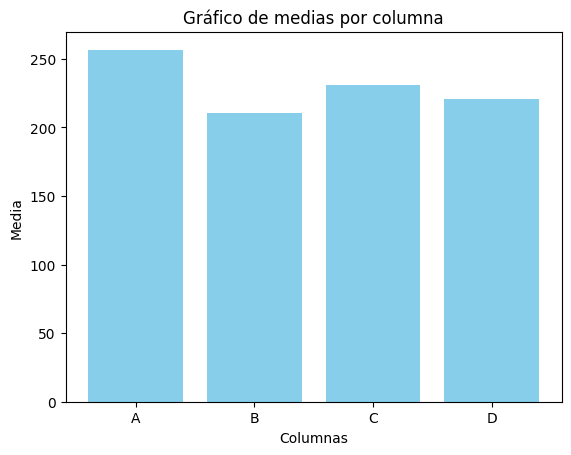

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular las medias por columna
medias_por_columna = Datos.mean()

# Crear el gráfico de barras
plt.bar(medias_por_columna.index, medias_por_columna.values, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Columnas')
plt.ylabel('Media')
plt.title('Gráfico de medias por columna')

# Mostrar el gráfico
plt.show()


# **Paso_4. Boxplot de los datos**

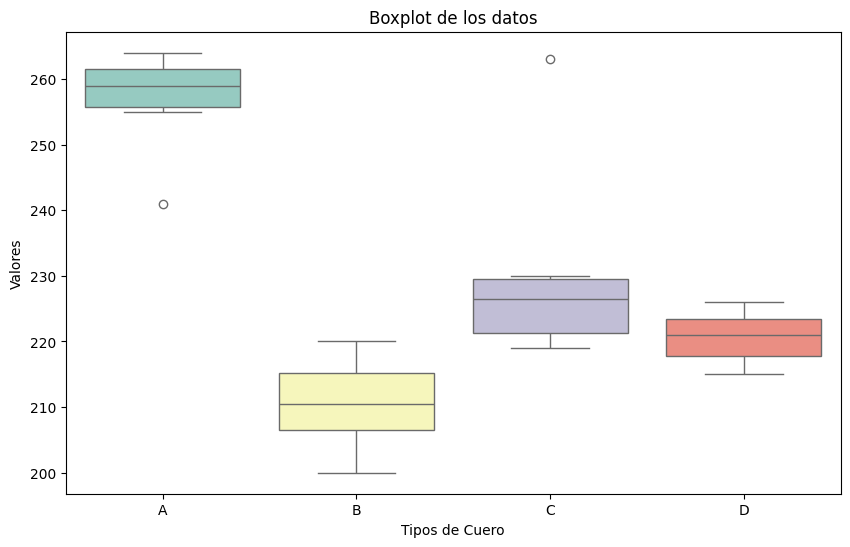

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización del boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=Datos, palette='Set3')
plt.title('Boxplot de los datos')
plt.xlabel('Tipos de Cuero')
plt.ylabel('Valores')
plt.show()


# **Paso_5. Tabla Anova**

In [7]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Datos proporcionados
desgaste = [[264, 208, 220, 217],
            [260, 220, 263, 226],
            [258, 216, 219, 215],
            [241, 200, 225, 224],
            [262, 213, 230, 220],
            [255, 206, 228, 222]]

columnas = ['A', 'B', 'C', 'D'] # Nombres de las columnas
filas = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6'] # Nombres de las filas

# Crear DataFrame
Datos = pd.DataFrame(desgaste, columns=columnas, index=filas)

# Preparar datos para ANOVA
stacked_data = Datos.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'Filas', 'level_1': 'Columnas', 0:'Valor'})

# Aplicar ANOVA
modelo = ols('Valor ~ C(Columnas)', data=stacked_data).fit()
anova_resultados = anova_lm(modelo)

print(anova_resultados)


               df       sum_sq      mean_sq          F    PR(>F)
C(Columnas)   3.0  7072.333333  2357.444444  23.237501  0.000001
Residual     20.0  2029.000000   101.450000        NaN       NaN


# **Paso_6. Graficos de Medias con intervalos de confianza de Tukey**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B -46.1667    0.0 -62.4431 -29.8903   True
     A      C -25.8333 0.0013 -42.1097  -9.5569   True
     A      D    -36.0    0.0 -52.2764 -19.7236   True
     B      C  20.3333 0.0112   4.0569  36.6097   True
     B      D  10.1667 0.3263  -6.1097  26.4431  False
     C      D -10.1667 0.3263 -26.4431   6.1097  False
------------------------------------------------------


<ipython-input-8-af88f955365c>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Columnas', y='Valores', data=stacked_data, palette='Set3')
<ipython-input-8-af88f955365c>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Columnas', y='Valores', data=stacked_data, color='black', join=False, markers='o', ci='sd')
<ipython-input-8-af88f955365c>:36: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='Columnas', y='Valores', data=stacked_data, color='black', join=False, markers='o', ci='sd')


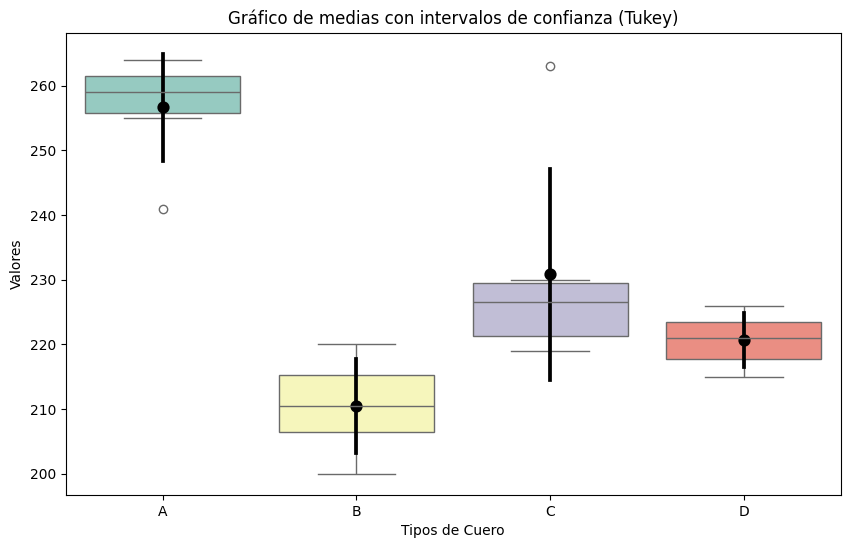

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Datos proporcionados
desgaste = [[264, 208, 220, 217],
            [260, 220, 263, 226],
            [258, 216, 219, 215],
            [241, 200, 225, 224],
            [262, 213, 230, 220],
            [255, 206, 228, 222]]

columnas = ['A', 'B', 'C', 'D'] # Nombres de las columnas
filas = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6'] # Nombres de las filas

# Crear DataFrame
Datos = pd.DataFrame(desgaste, columns=columnas, index=filas)

# Calcular las medias por columna
medias_por_columna = Datos.mean()

# Reshape de los datos para Tukey
stacked_data = Datos.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'Filas', 'level_1': 'Columnas', 0:'Valores'})

# Realizar el test Tukey
tukey_results = pairwise_tukeyhsd(stacked_data['Valores'], stacked_data['Columnas'])

# Resumen del test Tukey
print(tukey_results)

# Visualización de las medias con intervalos de confianza
plt.figure(figsize=(10, 6))
sns.boxplot(x='Columnas', y='Valores', data=stacked_data, palette='Set3')
sns.pointplot(x='Columnas', y='Valores', data=stacked_data, color='black', join=False, markers='o', ci='sd')
plt.title('Gráfico de medias con intervalos de confianza (Tukey)')
plt.xlabel('Tipos de Cuero')
plt.ylabel('Valores')
plt.show()


# **Paso_8. Prueba de Homocedasticidad para residuos**

In [9]:
from scipy.stats import levene

# Datos proporcionados
desgaste = [[264, 208, 220, 217],
            [260, 220, 263, 226],
            [258, 216, 219, 215],
            [241, 200, 225, 224],
            [262, 213, 230, 220],
            [255, 206, 228, 222]]

columnas = ['A', 'B', 'C', 'D'] # Nombres de las columnas
filas = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6'] # Nombres de las filas

# Crear DataFrame
Datos = pd.DataFrame(desgaste, columns=columnas, index=filas)

# Convertir los datos en un formato adecuado para la prueba de Levene
datos_para_levene = [Datos[col].values for col in Datos.columns]

# Realizar la prueba de Levene
statistic, p_value = levene(*datos_para_levene)

# Imprimir los resultados
print("Estadística de Levene:", statistic)
print("Valor p:", p_value)

# Interpretar el resultado
if p_value < 0.05:
    print("Se rechaza la hipótesis nula: No hay homogeneidad de varianzas.")
else:
    print("No se puede rechazar la hipótesis nula: Hay homogeneidad de varianzas.")


Estadística de Levene: 0.6655480984340044
Valor p: 0.5829775895886209
No se puede rechazar la hipótesis nula: Hay homogeneidad de varianzas.


# **Paso_8. Prueba Gráfica de Normalidad para residuos**

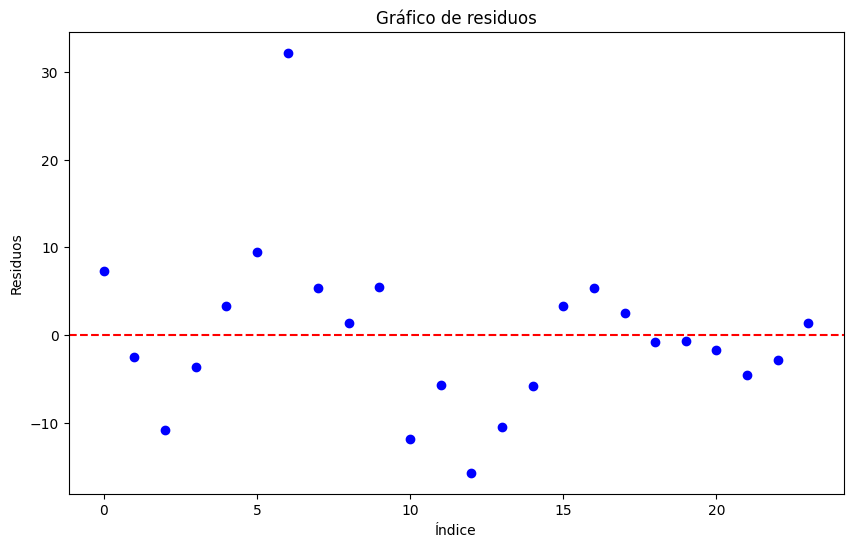

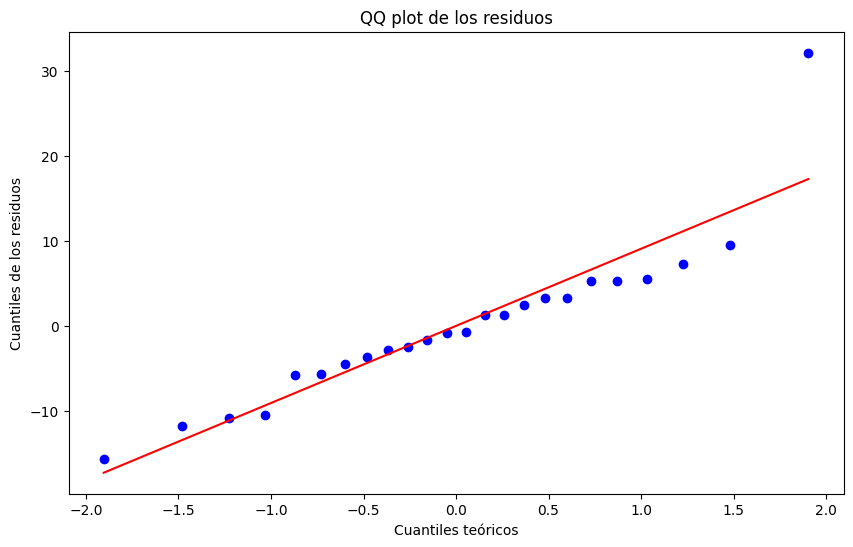

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import probplot

# Datos proporcionados
desgaste = [[264, 208, 220, 217],
            [260, 220, 263, 226],
            [258, 216, 219, 215],
            [241, 200, 225, 224],
            [262, 213, 230, 220],
            [255, 206, 228, 222]]

columnas = ['A', 'B', 'C', 'D'] # Nombres de las columnas
filas = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6'] # Nombres de las filas

# Crear DataFrame
Datos = pd.DataFrame(desgaste, columns=columnas, index=filas)

# Convertir los datos en un formato adecuado para el análisis
stacked_data = Datos.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'Filas', 'level_1': 'Columnas', 0:'Valor'})

# Ajustar un modelo lineal
modelo = sm.formula.ols('Valor ~ C(Columnas)', data=stacked_data).fit()

# Obtener los residuos
residuos = modelo.resid

# Gráfico de residuos
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(residuos)), residuos, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de residuos')
plt.xlabel('Índice')
plt.ylabel('Residuos')
plt.show()

# Gráfico de probabilidad normal (QQ plot)
plt.figure(figsize=(10, 6))
probplot(residuos, dist="norm", plot=plt)
plt.title('QQ plot de los residuos')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de los residuos')
plt.show()


# **Paso_9. Prueba Analítica de Normalidad para residuos**

In [11]:
from scipy.stats import normaltest

# Realizar la prueba de normalidad de los residuos
statistic, p_value = normaltest(residuos)

# Imprimir los resultados
print("Estadística de la prueba de normalidad:", statistic)
print("Valor p:", p_value)

# Interpretar el resultado
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: Los residuos no siguen una distribución normal.")
else:
    print("No se puede rechazar la hipótesis nula: Los residuos siguen una distribución normal.")


Estadística de la prueba de normalidad: 17.410685870707244
Valor p: 0.00016569812729869948
Se rechaza la hipótesis nula: Los residuos no siguen una distribución normal.


##**Histograma de los datos originales**

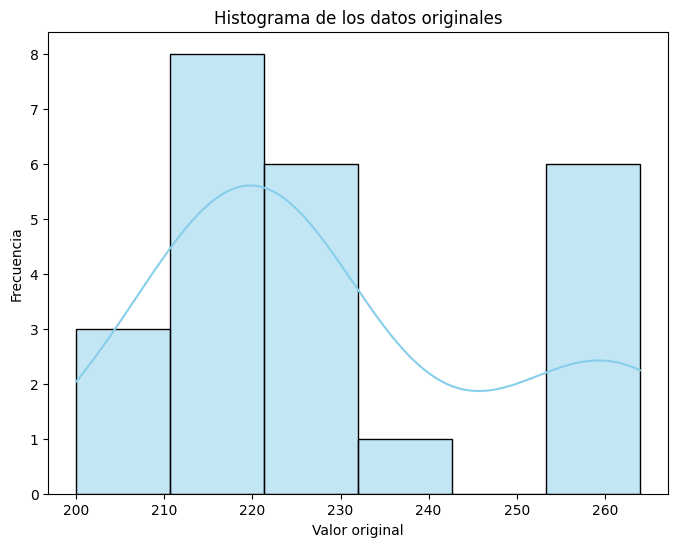

In [12]:
# Gráfico de los datos originales
plt.figure(figsize=(8, 6))
sns.histplot(stacked_data['Valor'], kde=True, color='skyblue')
plt.title('Histograma de los datos originales')
plt.xlabel('Valor original')
plt.ylabel('Frecuencia')
plt.show()


# **Paso_10. Prueba Analítica de Normalidad para residuos transformados**

+ Una forma común de transformar los datos para mejorar la normalidad es aplicar la transformación Box-Cox.
+ Sin embargo, es importante tener en cuenta que esta transformación solo es aplicable a datos estrictamente positivos.

+ Aquí te muestro cómo aplicar la transformación Box-Cox a tus datos y luego realizar la prueba de normalidad sobre los datos transformados:

+ Este código calculará la transformación Box-Cox de los datos y luego realizará la prueba de normalidad sobre los datos transformados.
+ Si el valor p de la prueba de normalidad transformada es menor que 0.05, se rechaza la hipótesis nula de que los datos transformados son normales.
+ De lo contrario, si el valor p es mayor o igual a 0.05, se asume que los datos transformados siguen una distribución normal.

In [13]:
from scipy.stats import boxcox
from scipy.stats import normaltest

# Aplicar la transformación Box-Cox a los datos
datos_transformados, lambda_value = boxcox(stacked_data['Valor'])

# Realizar la prueba de normalidad sobre los datos transformados
statistic_transformed, p_value_transformed = normaltest(datos_transformados)

# Imprimir los resultados
print("Estadística de la prueba de normalidad (transformada):", statistic_transformed)
print("Valor p (transformado):", p_value_transformed)

# Interpretar el resultado
alpha = 0.05
if p_value_transformed < alpha:
    print("Se rechaza la hipótesis nula: Los datos transformados no siguen una distribución normal.")
else:
    print("No se puede rechazar la hipótesis nula: Los datos transformados siguen una distribución normal.")


Estadística de la prueba de normalidad (transformada): 0.5675585153589686
Valor p (transformado): 0.7529328305035999
No se puede rechazar la hipótesis nula: Los datos transformados siguen una distribución normal.


**Este código creará un histograma de los datos transformados utilizando Seaborn, lo que te permitirá visualizar cómo se distribuyen los datos después de aplicar la transformación Box-Cox.**

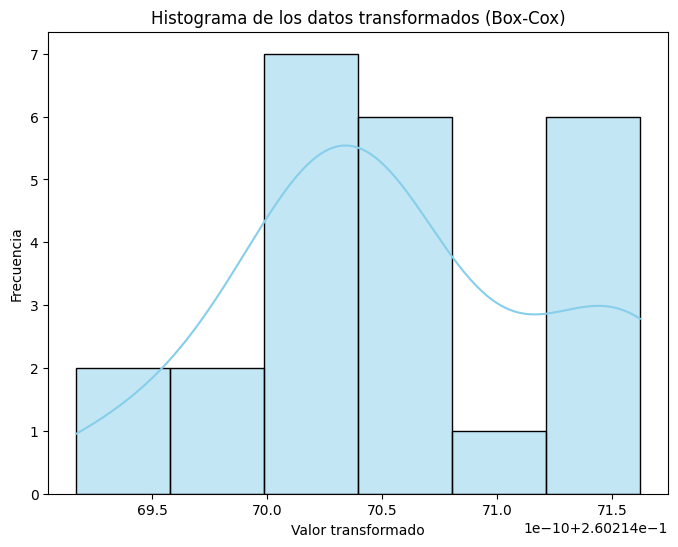

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear DataFrame con los datos transformados
transformed_data = pd.DataFrame({'Valor': datos_transformados})

# Gráfico de los datos transformados
plt.figure(figsize=(8, 6))
sns.histplot(transformed_data['Valor'], kde=True, color='skyblue')
plt.title('Histograma de los datos transformados (Box-Cox)')
plt.xlabel('Valor transformado')
plt.ylabel('Frecuencia')
plt.show()


# **Conocimiento. La transformación Box-Cox**

+ La transformación Box-Cox es una técnica utilizada para estabilizar la varianza y hacer que los datos se ajusten mejor a una distribución normal.
+ Fue propuesta por los estadísticos George Box y Sir David Roxbee Cox.

+ La transformación Box-Cox está definida por la fórmula:


$$y^{(\lambda)} = \frac{y^{\lambda}-1}{{\lambda}}, \quad si \quad {\lambda}\neq 0 \quad ó \quad y^{(\lambda)} =log(y), \quad si \quad {\lambda}= 0$$

Donde:
+ $y$ es la variable original.
+ $λ$ es el parámetro de transformación, que puede tomar cualquier valor real.

+ La transformación Box-Cox se utiliza para encontrar el valor de λ que maximiza la verosimilitud de que los datos se ajusten a una distribución normal.

+ Esto se hace probando diferentes valores de λ y seleccionando el que maximiza la similitud con una distribución normal. Una vez que se determina el valor óptimo de λ, se aplica la transformación a los datos originales.

+ Es importante tener en cuenta que la transformación Box-Cox solo es aplicable a datos estrictamente positivos, ya que implica tomar el logaritmo de los datos.
+ Si los datos contienen ceros o valores negativos, se deben aplicar otras técnicas de transformación.


# **Paso_11. Prueba de Independencia**

+ Para verificar la independencia de los residuos, una forma común es realizar el análisis de los residuos para detectar cualquier patrón o estructura sistemática que pueda indicar dependencia entre ellos.
+ Esto se puede hacer visualmente mediante un gráfico de autocorrelación o un gráfico de residuos contra las variables explicativas.

+ Aquí te muestro cómo puedes hacer ambas:

## **a. Gráfico de Autocorrelación de los Residuos:**

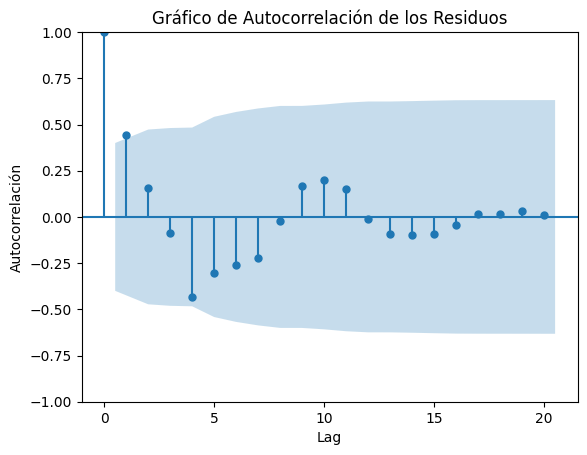

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

# Gráfico de autocorrelación de los residuos
plot_acf(residuos, lags=20)
plt.title('Gráfico de Autocorrelación de los Residuos')
plt.xlabel('Lag')
plt.ylabel('Autocorrelación')
plt.show()


**Si hay dependencia entre los residuos, verás autocorrelaciones significativas en el gráfico.**

## **b. Gráfico de Residuos contra las Variables Explicativas:**

In [21]:
print(residuos)

0      7.333333
1     -2.500000
2    -10.833333
3     -3.666667
4      3.333333
5      9.500000
6     32.166667
7      5.333333
8      1.333333
9      5.500000
10   -11.833333
11    -5.666667
12   -15.666667
13   -10.500000
14    -5.833333
15     3.333333
16     5.333333
17     2.500000
18    -0.833333
19    -0.666667
20    -1.666667
21    -4.500000
22    -2.833333
23     1.333333
dtype: float64


In [27]:
print(Datos[col])

F1    264
F2    260
F3    258
F4    241
F5    262
F6    255
Name: A, dtype: int64


## **c. Los datos en Python y definimos el DataFrame: Ingresamos los datos como columnas**

In [28]:
## **c. Los datos en Python y definimos el DataFrame: Ingresamos los datos como columnas**
import pandas as pd

Tipo_Cuero = (['A']*6+['B']*6+['C']*6+['D']*6)
Desgaste = [264, 260, 258, 241, 262, 255, 208, 220, 216, 200, 213, 206,
            220, 263, 219, 225, 230, 228, 217, 226, 215, 224, 220, 222]
Datos  = pd.DataFrame({'Tipo_Cuero': Tipo_Cuero, 'Desgaste': Desgaste})
Datos

,Tipo_Cuero,Desgaste
0,A,264
1,A,260
2,A,258
3,A,241
4,A,262
5,A,255
6,B,208
7,B,220
8,B,216
9,B,200


# **d. Gráfico de residuos contra las variables explicativas**

+ Si hay dependencia entre los residuos y las variables explicativas, verás algún patrón sistemático en los gráficos.

+ Además de estos métodos visuales, también puedes realizar pruebas estadísticas formales para verificar la independencia de los residuos, como la prueba de Durbin-Watson o la prueba de Ljung-Box.

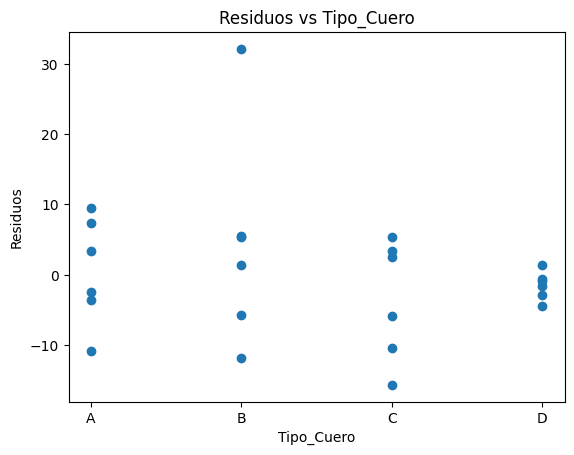

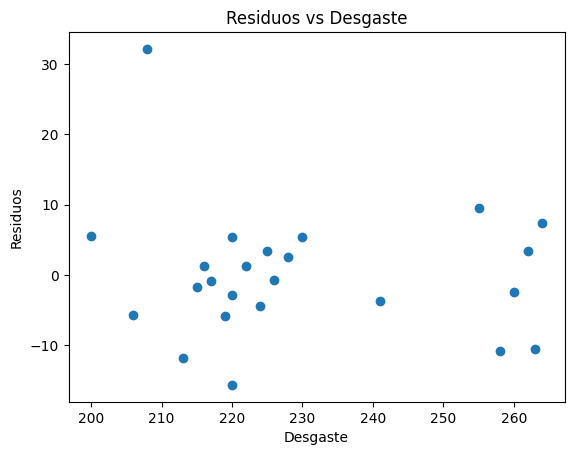

In [32]:
# Gráfico de residuos contra las variables explicativas
for col in Datos.columns:
    plt.scatter(Datos[col], residuos)
    plt.title(f'Residuos vs {col}')
    plt.xlabel(col)
    plt.ylabel('Residuos')
    plt.show()


##**Podemos asumir independencia si no encontramos un patrón claro en los gráficos de residuos contra el índice de observación o si la prueba de Durbin-Watson no indica autocorrelación.**

## **Paso_12. Prueba de Durbin-Watson**

In [33]:
from statsmodels.stats.stattools import durbin_watson

# Calcular la estadística de Durbin-Watson
durbin_watson_statistic = durbin_watson(residuos)

# Imprimir la estadística de Durbin-Watson
print("Estadística de Durbin-Watson:", durbin_watson_statistic)

# Interpretar la estadística de Durbin-Watson
if durbin_watson_statistic < 1.5:
    print("Indica autocorrelación positiva.")
elif durbin_watson_statistic > 2.5:
    print("Indica autocorrelación negativa.")
else:
    print("No indica autocorrelación significativa.")


Estadística de Durbin-Watson: 1.0818137013307052
Indica autocorrelación positiva.


## **Explicación de la Prueba de Durbin Watson**
+ La prueba de Durbin-Watson es una prueba estadística utilizada para detectar la presencia de autocorrelación en los residuos de un modelo de regresión.
+ La autocorrelación en los residuos significa que los errores están correlacionados entre sí, lo que sugiere que el modelo no está capturando toda la información en los datos.

+ La prueba de Durbin-Watson produce un estadístico que tiene un valor entre 0 y 4.
+ Un valor de 2 indica que no hay autocorrelación en los residuos.
+ Los valores más cercanos a 0 indican autocorrelación positiva (los residuos suelen estar correlacionados positivamente entre sí)
+ Los valores más cercanos a 4 indican autocorrelación negativa (los residuos suelen estar correlacionados negativamente entre sí).

+ La interpretación del estadístico de Durbin-Watson es la siguiente:

  - Si el valor está cerca de 2, no hay autocorrelación significativa.
  - Si el valor es menor que 2, indica autocorrelación positiva.
  - Si el valor es mayor que 2, indica autocorrelación negativa.




